CULERIER Baptiste - BERRECOCHEA Peio 3MFEE MSN: Assimilation de données 


# Homework 1: What time is it ?


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 18:48:59 2019
@author: Olivier THUAL

What time is it?
Data assimilation with two clocks

"""  
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## Théorie
L'objectif de cette prise en main au travers d'un problème d'horloge est de savoir si notre estimation est bonne. Pour cela nous allons calculer l'erreur définie par $$\rho=P(abs(T_a-T_t)<abs(T_1-T_t))$$. Si $\rho > 0.5$ cela signifie alors que notre estimation est meilleure qu'en utilisant une seule variable éléatoire.
Pour notre étude nous allons considérer 2 VAG (Variables Aléatoires Gaussiennes) $T_1$ et $T_2$ de même moyenne $T_t$ ayant pour variance $\sigma_1^2$ et $\sigma_2^2$ respectivement.
Par ailleurs, on définit leurs densités de probabilités par :
$$f_{T_1}(T)=\frac{1}{\sqrt{2\pi}\sigma_1}exp\left(-\frac{(T-T_t)^2}{2\sigma_1^2}\right)$$

$$f_{T_2}(T)=\frac{1}{\sqrt{2\pi}\sigma_2}exp\left(-\frac{(T-T_t)^2}{2\sigma_2^2}\right)$$

où $T_t=<T_1>=<T_2>$ est la moyenne et $\sigma_i^2=<T_i'^2>$ la variance, avec $T_i'=T_i-<T_i>$.

## Pratique
On définit ainsi $T_t=50$, $\sigma_1=2$ et $\sigma_2=5$ pour étudier le problème. D'après le cours on sait que $T^a$ permet de minimiser la fonction coût où : $$T^a=\frac{C_1 T_1 + C_2 T_2}{C_1-C_2}$$ Il ne nous reste donc plus qu'à lancer le programme avec ces paramètres.

======= Experiment 0 =======


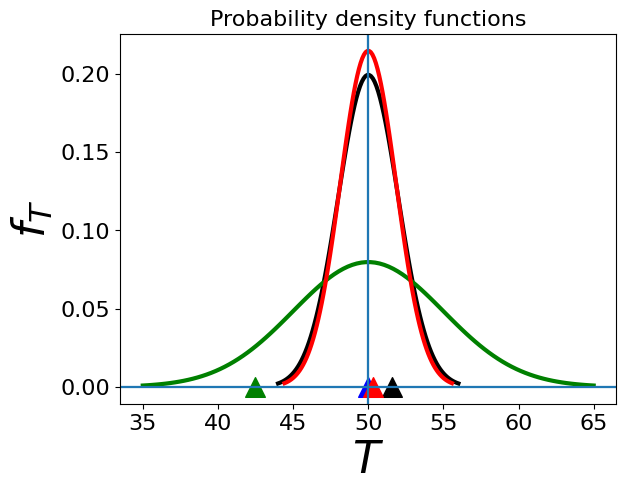

======= Experiment 1 =======


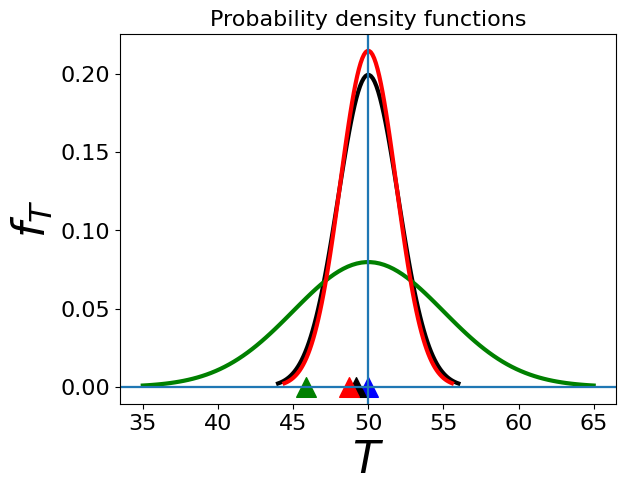

======= Experiment 2 =======


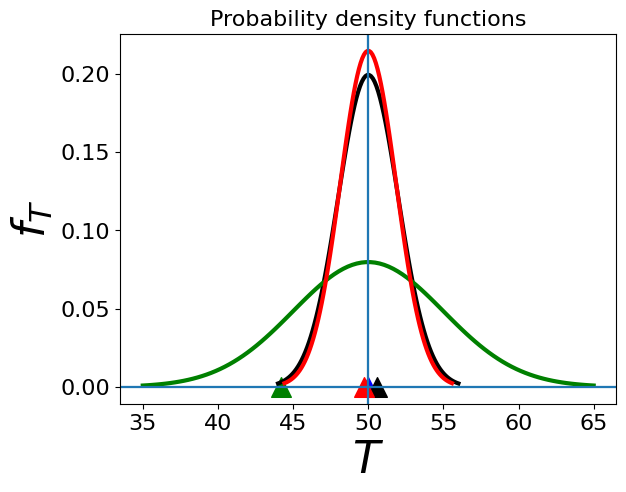

======= Experiment 3 =======


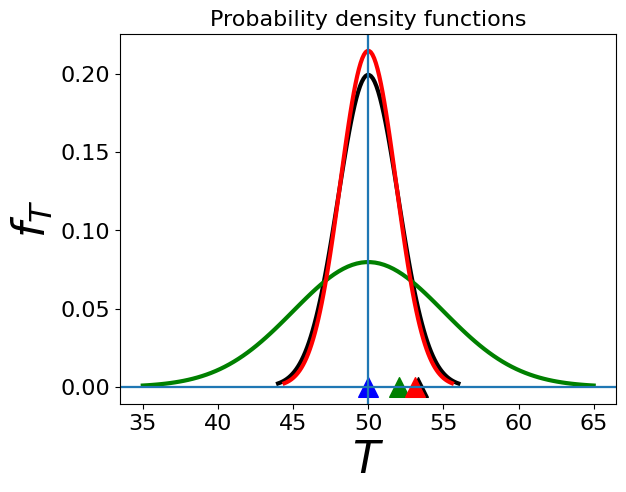

======= Experiment 4 =======


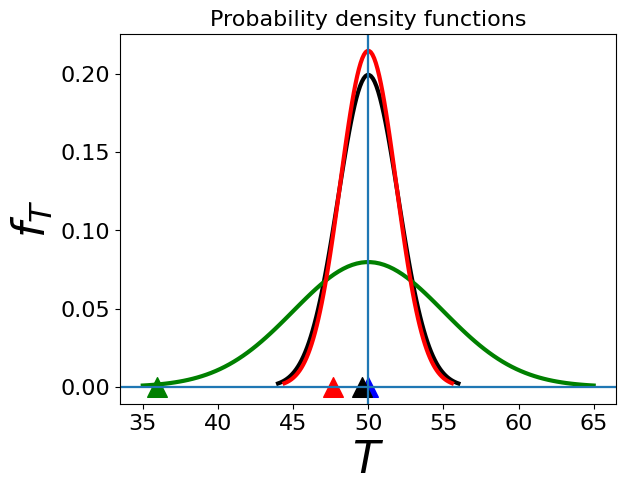

======= Experiment 5 =======


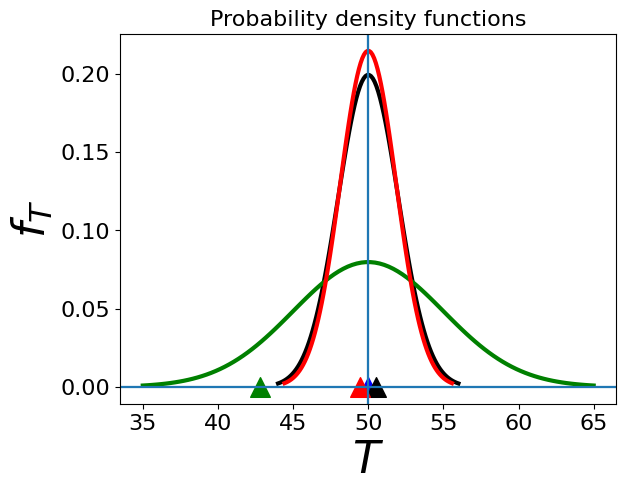

======= Experiment 6 =======


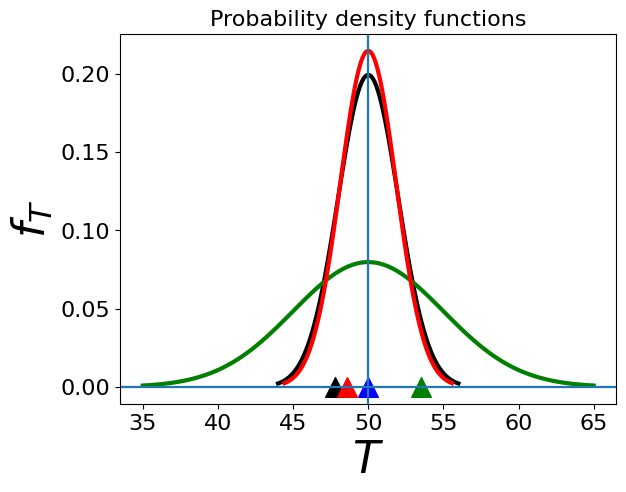

======= Experiment 7 =======


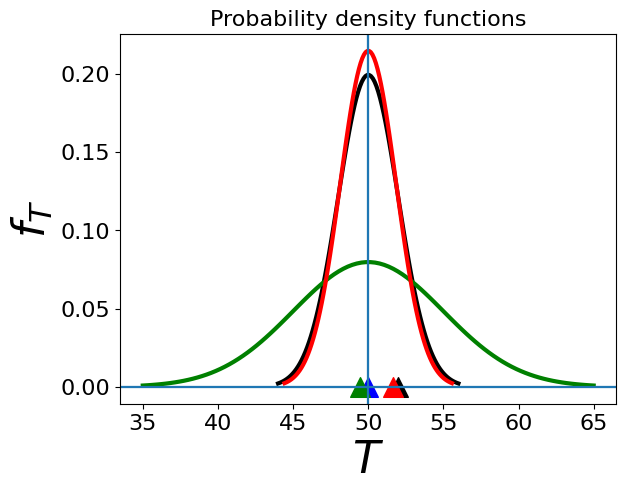

======= Experiment 8 =======


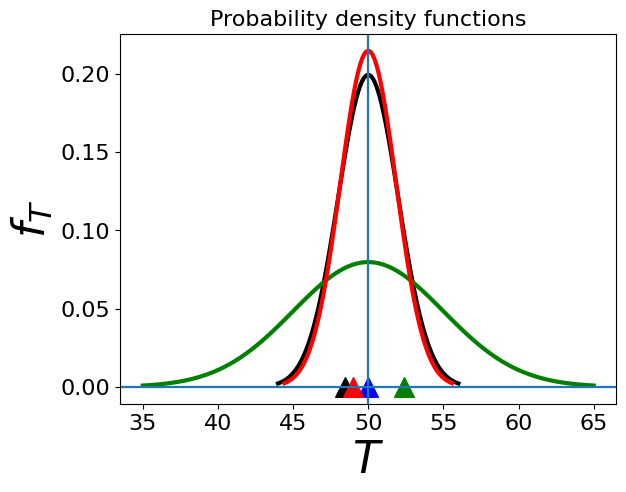

Rate of improvements rho= 0.568


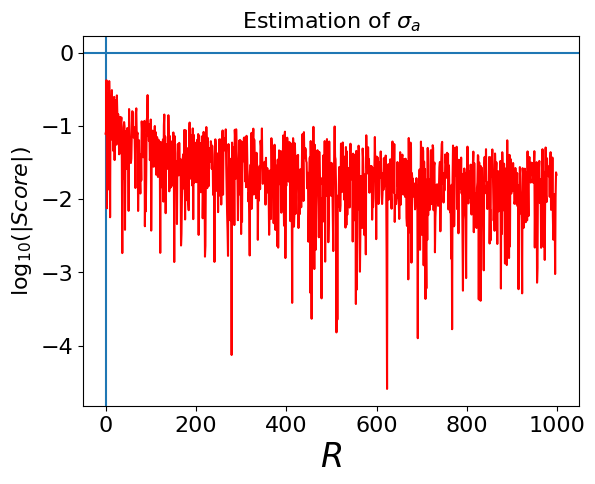

Close all figures to stop the program


In [3]:

# Parameters
Tt=50 # True state
sig1=2 ; C1=1/sig1**2 # T1
sig2=5 ; C2=1/sig2**2 # T2
Ca=C1+C2; siga=np.sqrt(1/Ca) # Ta

def fT(T,Tt,sig):
    # Gaussian probability density function 
    K=1/(np.sqrt(2*np.pi)*sig)
    f = K*np.exp(-(T-Tt)**2/(2*sig**2))
    return f,K

def val(Tt,sig,col) :
    # Ploting the probability density functions
    T = np.linspace(Tt-3*sig, Tt+3*sig, 100)
    f,K=fT(T,Tt,sig)
    plt.plot(T, f, color=col, linewidth=3)
    # Random sampling

    #Tr = np.random.normal(Tt,sig,20)
    #fR,KR=fT(Tr,Tt,sig)
    #plt.scatter(Tr,fR,marker='o',linewidth=3,color=col)

    plt.axhline(0)
    plt.axvline(Tt)
    plt.title('Probability density functions',fontsize=16)
    plt.xlabel('$T$',fontsize=32 )
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel('$f_{T}$',fontsize=32)
    
 

def histo(i) :
    # Ploting random draws on a line    
    plt.figure()
    val(Tt,sig1,'black');
    val(Tt,sig2,'green')
    val(Tt,siga,'red')
    # one draw
    T1=np.random.normal(Tt,sig1)
    T2=np.random.normal(Tt,sig2)
    Ta=(C1*T1+C2*T2)/Ca
    plt.scatter(Tt,0,marker='^',color='blue',s=200)
    plt.scatter(T1,0,marker='^',color='black',s=200)
    plt.scatter(T2,0,marker='^',color='green',s=200)
    plt.scatter(Ta,0,marker='^',color='red',s=200)

def improve(Nc):
    # Counting if T2 improves the analysis
    count=0
    for i in range(Nc) :
        T1=np.random.normal(Tt,sig1)
        T2=np.random.normal(Tt,sig2)
        Ta=(C1*T1+C2*T2)/Ca      
        if abs(Ta-Tt) < abs(T1-Tt) :
            count=count+1
    
    rho=count/Nc
    return rho
"""
The program starts here
"""    
     
      
# Plotting the histograms
if True :
    for i in range(9) :
        histo(i)
        #plt.draw()
        print('======= Experiment '+str(i)+' =======')
        plt.savefig('hist'+str(i)+'.pdf')
        plt.show(); plt.close()


# Counting the improvements
if True :
    rho=improve(1000)
    print('=================================')
    print('Rate of improvements rho=',rho)
    print('=================================')

# Scores for the estimation of sigma_a
if True :
    Rmax=1000; scores=[]
    
    for R in np.arange(2,Rmax+1) :
        ET=0; VT=0
        T1=np.random.normal(Tt,sig1,R)  
        T2=np.random.normal(Tt,sig2,R) 
        Ta=(C1*T1+C2*T2)/Ca
        E=np.sum(Ta)/R
        V=np.sum((Ta-E)**2)/(R-1)
        sigaR=np.sqrt(V)
        scor=(sigaR-siga)/siga
        scores=np.append(scores,scor)

    plt.figure()
    plt.axhline(0)
    plt.axvline(0)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.plot(range(Rmax-1),np.log10(np.abs(scores)),color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.xlabel('$R$',fontsize=24 )
    plt.ylabel('$\log_{10}(|Score|)$',fontsize=16)
    plt.savefig('scores.pdf')
    plt.show(); plt.close()
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()





Comme on peut le remarquer, dans ce cas $\rho = 0.568$ donc on a bien améliorer l'estimation. 
## Généralisation à N variables
Une généralisation de l'étude peut également être intéressante en considérant $N_T$ VAG. On va alors de même vérifier l'amélioration de l'estimation en utilisant cette fois $$T_a'=\frac{\sum C_i T_i}{\sum C_i}$$ où $C_i=\frac{1}{\sigma_i^2}$. On va faire 1000 réalisations pour chaque cas, représenté par $R$ dans le code ci-dessous et en conséquence on a tracé $1-\rho$ en fonction de N pour savoir si l'on améliore l'estimation, se traduisant par un mouvement convergent vers 1 si N augmente.

Rate of improvemennts with 3 random variables rho= 0.586
Rate of improvemennts with 10 random variables rho= 0.673


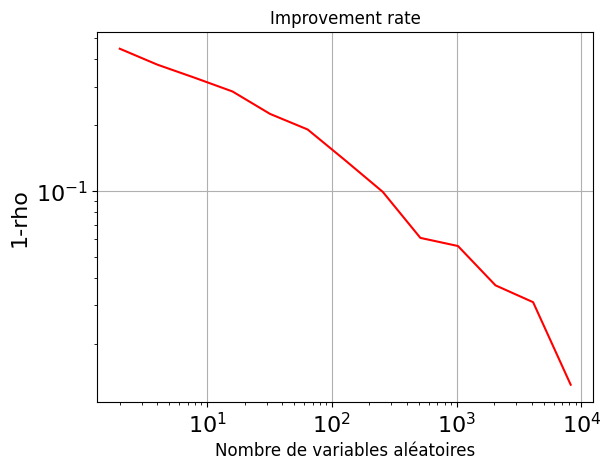

In [7]:
#Amélioration de l'estimation de T_t avec NT variables aléatoires

def improveNT(Nc,NT):
    # Counting if T2 improves the analysis
    count=0
    for i in range(Nc) :
        T=np.zeros(NT)
        T[0]=np.random.normal(Tt,sig1)
        for j in range(1,NT):
          T[j]=np.random.normal(Tt,sig2)
        Ta=(C1*T[0]+C2*np.sum(T[1:]))/(C1+(NT-1)*C2)     
        if abs(Ta-Tt) < abs(T[0]-Tt) :
            count=count+1
    
    rho=count/Nc
    return rho

# Counting the improvements with NT=3 random variables
if True :
    rho=improveNT(1000,3)
    print('=================================')
    print('Rate of improvemennts with 3 random variables rho=',rho)
    print('=================================')




# Counting the improvements with NT=10 random variables
if True :
    rho=improveNT(1000,10)
    print('=================================')
    print('Rate of improvemennts with 10 random variables rho=',rho)
    print('=================================')


#Plot rate of improvement with NT:

NT_list=np.array([2**i for i in range(1,14)])
rho=[]

for i in NT_list:
  rho.append(improveNT(1000,i))

rho=np.array(rho)
plt.figure()
plt.axhline(0)
plt.axvline(0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(NT_list,1-rho,color='red')

plt.title('Improvement rate',fontsize=12)
plt.xlabel('Nombre de variables aléatoires',fontsize=12 )
plt.xscale('log')
plt.ylabel('1-rho',fontsize=16)
plt.yscale('log')
plt.savefig('rho.pdf')
plt.grid()
plt.show(); plt.close()

Comme on peut le constater, l'utiliser de plusieurs VAG a donc un réel intérêt en ce qui concerne l'estimation, la rendant meilleure.